# Tensor计算
Tensor 中文被翻译为张量。张量在不同学科中有不同的意义，在深度学习中张量表示的是一个多维数组，它是标量、向量、矩阵的拓展。标量是零维张量，向量是一维张量，矩阵是二维张量，一个RGB图像的数组就是一个三维张量，第一维是图像的高，第二维是图像的宽，第三维是图像的颜色通道。

在pytorch中，有两个张量的相关概念极其容易混淆，分别是torch.Tensor和torch.tensor。其实，通过命名规范，可知道torch.Tensor是Python的一个类, torch.tensor是Python的一个函数。通常我们调用torch.tensor进行创建张量，而不直接调用torch.Tensor类进行创建。

torch.tensor：pytorch的一个函数，用于将数据变为张量形式的数据，例如list, tuple, NumPy ndarray, scalar等。

后续将不再区分Tensor和tensor，主要用小写tensor表示张量这个数据类型（数据结构）。

tensor之于pytorch等同于ndarray之于numpy，它是pytorch中最核心的数据结构，用于表达各类数据，如：
1.输入数据
2.模型的参数
3.模型的特征图
4.模型的输出

## 模型参数
这里边有一个很重要的数据，就是模型的参数。对于模型的参数，我们需要更新它们，而更新操作需要记录梯度，梯度的记录功能正是被张量所实现的（求梯度是autograd实现的）。

## pytorch张量类历史
在0.4.0版本之前，Tensor需要经过Variable的包装才能实现自动求导。从0.4.0版本开始，torch.Tensor与torch.autograd.Variable合并，torch.Tensor拥有了跟踪历史操作的功能。虽然Variable仍可用，但Variable返回值已经是一个Tensor（原来返回值是Variable），所以今后无需再用Variable包装Tensor。

### Variable
虽然Variable的概念已经被摒弃，但是了解其数据结构对理解Tensor还是有帮助的。Variable不仅能对Tensor包装，而且能记录生成Tensor的运算（这是自动求导的关键）。在Variable类中包含5个属性：data、grad、grad_fn、is_leaf、requires_grad

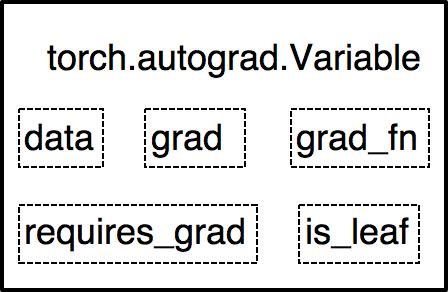

data: 保存的是具体数据，即被包装的Tensor；
grad: 对应于data的梯度，形状与data一致；
grad_fn: 记录创建该Tensor时用到的Function，该Function在反向传播计算中使用，因此是自动求导的关键；
requires_grad: 指示是否计算梯度；
is_leaf: 指示节点是否为叶子节点，为叶子结点时，反向传播结束，其梯度仍会保存，非叶子结点的梯度被释放，以节省内存。
从Variable的主要属性中可以发现，除了data外，grad，grad_fn，is_leaf和requires_grad都是为计算梯度服务，所以Variable在torch.autogard包中自然不难理解。

但是我们的数据载体是tensor，每次需要自动求导，都要用Variable包装，这明显太过繁琐，于是PyTorch从0.4.0版将torch.Tensor与torch.autograd.Variable合并。
### tensor
tensor是一个类，我们先来认识它有哪些属性，再去观察它有哪些方法函数可使用。

Tensor主要有以下八个主要属性，data，dtype，shape，device，grad，grad_fn，is_leaf，requires_grad。

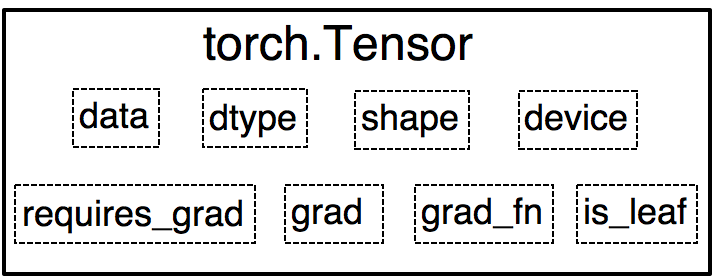

data：多维数组，最核心的属性，其他属性都是为其服务的;

dtype：多维数组的数据类型，tensor数据类型如下，常用到的三种已经用红框标注出来；

shape：多维数组的形状;

device: tensor所在的设备，cpu或cuda;

grad，grad_fn，is_leaf和requires_grad就与Variable一样，都是梯度计算中所用到的。

张量的属性还有很多，大家可以通过Pycharm的debug功能进行查看

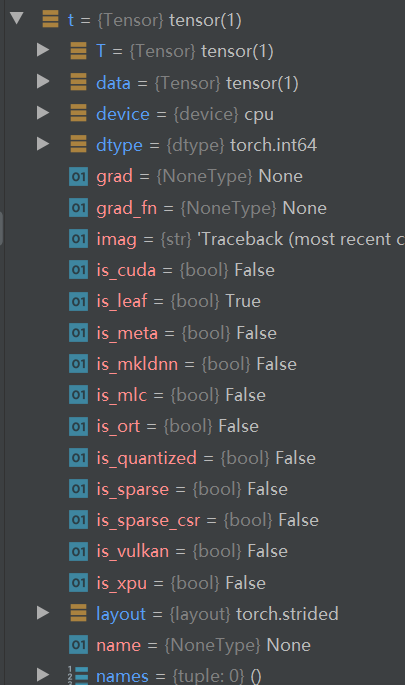

# 张量创建
函数torch.Tensor为所需的张量分配内存，但会重用内存中已有的任何值。要在初始化时直接给张量赋值，有很多替代方法，包括：

- torch.zeros：创建一个全是零的张量
- torch.ones：创建一个全是1的张量
- torch.zeros_like：依input的size创建全0的tensor
- torch.rand：创建一个在0到1之间均匀采样的随机值张量
- torch.randn：创建一个从均值为0，方差为1的正态分布中采样的随机值张量
- torch.arange：创建一个包含从N, N+1, N+2, ... 到M的值的张量
- torch.Tensor（输入列表）：从你提供的列表元素中创建一个张量
- torch.linspace：创建均分的1维张量，长度为steps
- torch.logspace创建对数均分的1维张量，长度为steps, 底为base
- torch.eye:创建单位对称矩阵
- torch.normal为每一个元素以给定的mean和std用高斯分布生成随机数

### torch.tensor
- torch.tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False)

- data(array_like) - tensor的初始数据，可以是list, tuple, numpy array, scalar或其他类型。

- dtype(torch.dtype, optional) - tensor的数据类型，如torch.uint8, torch.float, torch.long等

- device (torch.device, optional) – 决定tensor位于cpu还是gpu。如果为None，将会采用默认值，默认值在torch.set_default_tensor_type()中设置，默认为 cpu。

- requires_grad (bool, optional) – 决定是否需要计算梯度。

- pin_memory (bool, optional) – 是否将tensor存于锁页内存。这与内存的存储方式有关，通常为False。

In [3]:
import torch
import numpy as np
l = [[1., -1.], [1., -1.]]
t_from_list = torch.tensor(l)
arr = np.array([[1, 2, 3], [4, 5, 6]])
t_from_array = torch.tensor(arr, dtype=torch.long)
print(t_from_list, t_from_list.dtype)
print(t_from_array, t_from_array.dtype)

tensor([[ 1., -1.],
        [ 1., -1.]]) torch.float32
tensor([[1, 2, 3],
        [4, 5, 6]]) torch.int64


### torch.zeros
torch.zeros(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：依给定的size创建一个全0的tensor，默认数据类型为torch.float32（也称为torch.float）。

主要参数：

- layout(torch.layout, optional) - 参数表明张量在内存中采用何种布局方式。常用的有torch.strided, torch.sparse_coo等。

- out(tensor, optional) - 输出的tensor，即该函数返回的tensor可以通过out进行赋值，请看例子。

下面例子可以看到，通过torch.zeros创建的张量不仅赋给了t，同时赋给了o_t，并且这两个张量是共享同一块内存，只是变量名不同。


In [4]:
import torch
o_t = torch.tensor([1])
t = torch.zeros((3, 3), out=o_t)
print(t, '\n', o_t)
print(id(t), id(o_t))

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) 
 tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
5369057184 5369057184


### torch.zeros_like
torch.zeros_like(input, dtype=None, layout=None, device=None, requires_grad=False)

功能：依input的size创建全0的tensor。

主要参数：

- input(Tensor) - 创建的tensor与intput具有相同的形状。

In [5]:
import torch
t1 = torch.tensor([[1., -1.], [1., -1.]])
t2 = torch.zeros_like(t1)
print(t2)

tensor([[0., 0.],
        [0., 0.]])


除了创建全0还有创建全1的tensor，使用方法是一样的，这里就不赘述。

- torch.ones(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：依给定的size创建一个全1的tensor。

- torch.ones_like(input, dtype=None, layout=None, device=None, requires_grad=False)

功能：依input的size创建全1的tensor。

- torch.full(size, fill_value, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：依给定的size创建一个值全为fill_value的tensor。

主要参数:

siz (int...) - tensor的形状。

fill_value - 所创建tensor的值

out(tensor, optional) - 输出的tensor，即该函数返回的tensor可以通过out进行赋值。

torch.full_like(input, fill_value, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

torch.full_like之于torch.full等同于torch.zeros_like之于torch.zeros，因此不再赘述。

In [6]:
import torch
print(torch.full((2, 3), 3.141592))

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])


### torch.arange

torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：创建等差的1维张量，长度为 (end-start)/step，需要注意数值区间为[start, end)。

主要参数：

- start (Number) – 数列起始值，默认值为0。the starting value for the set of points. Default: 0.

- end (Number) – 数列的结束值。

- step (Number) – 数列的等差值，默认值为1。

- out (Tensor, optional) – 输出的tensor，即该函数返回的tensor可以通过out进行赋值。

In [7]:
import torch
print(torch.arange(1, 2.51, 0.5))

tensor([1.0000, 1.5000, 2.0000, 2.5000])


### torch.linspace
torch.linspace(start, end, steps=100, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：创建均分的1维张量，长度为steps，区间为[start, end]。

主要参数：

- start (float) – 数列起始值。

- end (float) – 数列结束值。

- steps (int) – 数列长度。

In [8]:
print(torch.linspace(3, 10, steps=5))
print(torch.linspace(1, 5, steps=3))

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])
tensor([1., 3., 5.])


### torch.logspace
torch.logspace(start, end, steps=100, base=10.0, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：创建对数均分的1维张量，长度为steps, 底为base。

主要参数：

- start (float) – 确定数列起始值为base^start

- end (float) – 确定数列结束值为base^end

- steps (int) – 数列长度。

- base (float) - 对数函数的底，默认值为10，此参数是在pytorch 1.0.1版本之后加入的。

In [10]:
print(torch.logspace(start=0.1, end=1.0, steps=5))
print(torch.logspace(start=2, end=2, steps=1, base=2))

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])
tensor([4.])


### torch.eye
torch.eye(n, m=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)**

功能：创建单位对角矩阵。

主要参数：

- n (int) - 矩阵的行数

- m (int, optional) - 矩阵的列数，默认值为n，即默认创建一个方阵

torch.empty(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False)

功能：依size创建“空”张量，这里的“空”指的是不会进行初始化赋值操作。

主要参数：

- size (int...) - 张量维度

- pin_memory (bool, optional) - pinned memory 又称page locked memory，即锁页内存，该参数用来指示是否将tensor存于锁页内存，通常为False，若内存足够大，建议设置为True，这样在转到GPU时会快一些。

torch.empty_like(input, dtype=None, layout=None, device=None, requires_grad=False)

功能：torch.empty_like之于torch.empty等同于torch.zeros_like之于torch.zeros，因此不再赘述。

torch.empty_strided(size, stride, dtype=None, layout=None, device=None, requires_grad=False, pin_memory=False)

功能：依size创建“空”张量，这里的“空”指的是不会进行初始化赋值操作。

主要参数：

- stride (tuple of python:ints) - 张量存储在内存中的步长，是设置在内存中的存储方式。

- size (int...) - 张量维度

- pin_memory (bool, optional) - 是否存于锁页内存。

In [11]:
import torch
print(torch.eye(3))
print(torch.eye(3, 4))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])


## 依概率分布创建

### torch.normal(mean, std, out=None)

功能：为每一个元素以给定的mean和std用高斯分布生成随机数

主要参数：

- mean (Tensor or Float) - 高斯分布的均值，

- std (Tensor or Float) - 高斯分布的标准差

特别注意事项：

mean和std的取值分别有2种，共4种组合，不同组合产生的效果也不同，需要注意

mean为张量，std为张量，torch.normal(mean, std, out=None)，每个元素从不同的高斯分布采样，分布的均值和标准差由mean和std对应位置元素的值确定；

mean为张量，std为标量，torch.normal(mean, std=1.0, out=None)，每个元素采用相同的标准差，不同的均值；

mean为标量，std为张量，torch.normal(mean=0.0, std, out=None)， 每个元素采用相同均值，不同标准差；

mean为标量，std为标量，torch.normal(mean, std, size, *, out=None) ，从一个高斯分布中生成大小为size的张量；

In [13]:
import torch
mean = torch.arange(1, 11.)
std = torch.arange(1, 0, -0.1)
normal = torch.normal(mean=mean, std=std)
print("mean: {}, \nstd: {}, \nnormal: {}".format(mean, std, normal))

mean: tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 
std: tensor([1.0000, 0.9000, 0.8000, 0.7000, 0.6000, 0.5000, 0.4000, 0.3000, 0.2000,
        0.1000]), 
normal: tensor([2.0090, 2.4055, 3.3549, 4.5409, 4.2556, 5.7518, 7.8943, 8.0112, 9.3216,
        9.9171])


### torch.rand
torch.rand(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：在区间[0, 1)上，生成均匀分布。

主要参数：

- size (int...) - 创建的张量的形状

torch.rand_like(input, dtype=None, layout=None, device=None, requires_grad=False)

torch.rand_like之于torch.rand等同于torch.zeros_like之于torch.zeros，因此不再赘述。

torch.randint(low=0, high, size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：在区间[low, high)上，生成整数的均匀分布。

主要参数：

- low (int, optional) - 下限。

- high (int) – 上限，主要是开区间。

- size (tuple) – 张量的形状。

torch.randint_like(input, low=0, high, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：torch.randint_like之于torch.randint等同于torch.zeros_like之于torch.zeros，因此不再赘述。

torch.randn(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：生成形状为size的标准正态分布张量。

主要参数：

- size (int...) - 张量的形状

torch.randn_like(input, dtype=None, layout=None, device=None, requires_grad=False)

功能：torch.rafndn_like之于torch_randn等同于torch.zeros_like之于torch.zeros，因此不再赘述。

torch.randperm(n, out=None, dtype=torch.int64, layout=torch.strided, device=None, requires_grad=False)

功能：生成从0到n-1的随机排列。perm == permutation

torch.bernoulli(input, *, generator=None, out=None)

功能：以input的值为概率，生成伯努力分布（0-1分布，两点分布）。

主要参数：

- input (Tensor) - 分布的概率值，该张量中的每个值的值域为[0-1]


In [14]:
print(torch.randint(3, 10, (2, 2)))

tensor([[8, 6],
        [5, 9]])


In [15]:
import torch
p = torch.empty(3, 3).uniform_(0, 1)
b = torch.bernoulli(p)
print("probability: \n{}, \nbernoulli_tensor:\n{}".format(p, b))

probability: 
tensor([[0.0689, 0.3546, 0.0495],
        [0.7578, 0.7355, 0.6756],
        [0.1743, 0.6488, 0.6351]]), 
bernoulli_tensor:
tensor([[0., 0., 0.],
        [1., 1., 1.],
        [0., 1., 0.]])


## 常用Tensor操作  

以下是一些常用的Tensor操作方法及其功能。  

| 函数                | 作用描述                                                                                         |  
|---------------------|--------------------------------------------------------------------------------------------------|  
| **cat**             | 将多个张量拼接在一起，例如多个特征图的融合可用。                                                  |  
| **concat**          | 同cat，是cat()的别名。                                                                            |  
| **conj**            | 返回共轭复数。                                                                                     |  
| **chunk**           | 将tensor在某个维度上分成n份。                                                                     |  
| **dsplit**          | 类似numpy.dsplit()，将张量按索引或指定的份数进行切分。                                            |  
| **column_stack**    | 水平堆叠张量，即在第二个维度上增加，等同于torch.hstack。                                         |  
| **dstack**          | 沿第三个轴进行逐像素(depthwise)拼接。                                                             |  
| **gather**          | 高级索引方法，目标检测中常用于索引bbox。在指定的轴上，根据给定的index进行索引。建议查看example。  |  
| **hsplit**          | 类似numpy.hsplit()，将张量按列进行切分。可以按整数等分，或按list中元素进行索引。                   |  
| **hstack**          | 水平堆叠张量，即在第二个维度上增加，等同于torch.column_stack。                                    |  
| **index_select**    | 在指定的维度上，按索引选择数据，然后拼接成新张量。                                                |  
| **masked_select**   | 根据mask（0/1, False/True形式的mask）来索引数据，返回1-D张量。                                     |  
| **movedim**         | 移动轴，如0，1轴交换：`torch.movedim(t, 1, 0)` 。                                                 |  
| **moveaxis**        | 同movedim。为torch.movedim()的别名。                                                              |  
| **narrow**          | 在指定轴上，设置起始和长度进行索引。                                                               |  
| **nonzero**         | 返回非零元素的index。                                                                              |  
| **permute**         | 交换轴。                                                                                           |  
| **reshape**         | 变换形状。                                                                                         |  
| **row_stack**       | 按行堆叠张量，即在第一个维度上增加，等同于torch.vstack。                                           |  
| **scatter**         | `scatter_(dim, index, src, reduce=None)` → Tensor。根据index中的索引在dim方向填充数据。             |  
| **scatter_add**     | 与scatter相同，对input进行元素修改，这里是 `+=`，而scatter是直接替换。                              |  
| **split**           | 按给定的大小切分出多个张量。                                                                       |  
| **squeeze**         | 移除张量为1的轴。                                                                                  |  
| **stack**           | 在新的轴上拼接张量。                                                                               |  
| **swapaxes**        | 为torch.transpose()的别名，交换轴。                                                                |  
| **swapdims**        | 为torch.transpose()的别名，交换轴。                                                                |  
| **t**               | 转置。                                                                                             |  
| **take**            | 取出张量中的某些元素，返回1D张量。                                                                  |  
| **take_along_dim**  | 取出张量中的某些元素，返回的张量与index的维度保持一致。与torch.argmax(t)和torch.argsort结合使用。     |  
| **tensor_split**    | 切分张量。                                                                                         |  
| **tile**            | 将张量重复X遍，X遍可以按多个维度进行重复。                                                          |  
| **transpose**       | 交换轴。                                                                                           |  
| **unbind**          | 移除张量的某个轴，并返回一串张量。                                                                 |  
| **unsqueeze**       | 增加一个轴，常用于匹配数据维度。                                                                   |  
| **vsplit**          | 垂直切分。                                                                                         |  
| **vstack**          | 垂直堆叠。                                                                                         |  
| **where**           | 根据条件选择x的元素还是y的元素，拼接成新张量。                                                     |  


## scatter_  

scatter是将input张量中的部分值进行替换。公式如下：  

```python  
self[index[i][j][k]][j][k] = src[i][j][k]  # if dim == 0  
self[i][index[i][j][k]][k] = src[i][j][k]  # if dim == 1  
self[i][j][index[i][j][k]] = src[i][j][k]  # if dim == 2

```
### 设计两个核心问题：  

1. **input哪个位置需要替换？**  
2. **替换成什么？**
### 答：

1. **从公式可知道，依次从index中找到元素放到dim的位置，就是input需要变的地方。**
2. **变成什么呢？ 从src中找，src中与index一样位置的那个元素值放到input中。**

In [17]:
src = torch.arange(1, 11).reshape((2, 5))
src

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [18]:
index = torch.tensor([[0, 1, 2, 0]])
torch.zeros(3, 5, dtype=src.dtype).scatter_(0, index, src)

tensor([[1, 0, 0, 4, 0],
        [0, 2, 0, 0, 0],
        [0, 0, 3, 0, 0]])

调用 x1 + x2 会创建一个包含两个输入之和的新张量。但是，我们也可以使用直接应用于张量内存的原地操作。这样我们就能改变 x2 的值，而无法在操作之前重新访问 x2 的原始值。下面是一个例子：

In [19]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 tensor([[0.8010, 0.6926, 0.6955],
        [0.9604, 0.1434, 0.8479]])
X2 tensor([[0.9022, 0.4020, 0.5836],
        [0.6046, 0.4868, 0.5535]])
Y tensor([[1.7032, 1.0946, 1.2791],
        [1.5650, 0.6302, 1.4014]])
X1 (before) tensor([[4.4972e-04, 8.5017e-02, 5.9424e-01],
        [8.3599e-02, 6.9334e-01, 5.4743e-01]])
X2 (before) tensor([[0.0387, 0.0551, 0.2694],
        [0.8774, 0.5524, 0.9045]])
X1 (after) tensor([[4.4972e-04, 8.5017e-02, 5.9424e-01],
        [8.3599e-02, 6.9334e-01, 5.4743e-01]])
X2 (after) tensor([[0.0391, 0.1401, 0.8636],
        [0.9610, 1.2458, 1.4520]])


原地操作通常用下划线后缀标记（例如，用“add_”而不是“add”）。

另一个常见的操作是更改张量的形状。一个大小为 (2,3) 的张量可以重新组织为具有相同元素数量的任何其他形状（例如，一个大小为 (6) 或 (3,2) 的张量，等等）。在 PyTorch 中，这种操作称为 view：

In [20]:
x = torch.arange(6)
print("X", x)
x = x.view(2, 3)
print("X", x)
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])
X tensor([[0, 1, 2],
        [3, 4, 5]])
X tensor([[0, 3],
        [1, 4],
        [2, 5]])


其他常用的操作包括矩阵乘法，这对于神经网络来说是必不可少的。我们常常需要对输入向量 \( x \) 使用一个学习到的权重矩阵 \( W \) 进行变换。执行矩阵乘法的方法和函数有很多，下面列出一些：

- **torch.matmul**：对两个张量执行矩阵乘积操作，其具体行为取决于维度。如果两个输入都是矩阵（2维张量），则执行标准矩阵乘积。对于更高维输入，该函数支持广播（详情见文档）。也可以写作 a @ b，类似于 numpy。

- **torch.mm**：对两个矩阵执行矩阵乘积，但不支持广播（详情见文档）。

- **torch.bmm**：支持批处理维度的矩阵乘积。如果第一个张量 \( T \) 的形状是 (\( b \times n \times m \))，第二个张量 \( R \) 的形状是 (\( b \times m \times p \))，则输出 \( O \) 的形状为 (\( b \times n \times p \))，其计算方法是对 \( T \) 和 \( R \) 的子矩阵执行 \( b \) 次矩阵乘法：\( O_i = T_i @ R_i \)。

- **torch.einsum**：使用爱因斯坦求和约定执行矩阵乘法及更多操作（例如，乘积的和）。爱因斯坦求和的解释见作业1。

通常，我们使用 torch.matmul 或 torch.bmm。下面我们可以尝试用 torch.matmul 进行矩阵乘法。


In [21]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

X tensor([[0, 1, 2],
        [3, 4, 5]])
W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
h tensor([[15, 18, 21],
        [42, 54, 66]])


我们经常需要选择张量的一部分。索引的用法就像在 numpy 中一样，所以让我们试试看：

In [22]:
x = torch.arange(12).view(3, 4)
print("X", x)
print(x[:, 1])   # Second column
print(x[0])      # First row
print(x[:2, -1]) # First two rows, last column
print(x[1:3, :]) # Middle two rows

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


## 张量的随机种子  

随机种子（random seed）是编程语言中基础的概念，大多数编程语言都有随机种子的概念，它主要用于实验的复现。针对随机种子，PyTorch也有一些设置函数。  

- **seed**: 获取一个随机的随机种子。返回一个64位的数字用于初始化随机数生成器。  
- **manual_seed**: 手动设置随机种子，建议设置为42，这是近期一个玄学研究，说42有效提高模型精度。当然大家可以设为自己喜欢的，只要保持一致即可。  
- **initial_seed**: 返回初始种子。  
- **get_rng_state**: 获取随机数生成器状态。返回随机数生成器状态作为一个torch.ByteTensor。  
- **set_rng_state**: 设定随机数生成器状态。这两者如何使用暂时未知。设置随机数生成器状态。  

以上均是设置CPU上的张量随机种子，在CUDA上是另外一套随机种子，如`torch.cuda.manual_seed_all(seed)`。这些将在CUDA模块中再进行介绍，这里只需要知道在CPU和CUDA上需要分别设置随机种子。  

## 张量的数学操作  

张量还提供大量数学操作，估计了一下，有快一百个函数，这里就不再一一分析，只需要知道有哪几大类，用到的时候来查吧。  

- **Pointwise Ops**: 逐元素的操作，如`abs`，`cos`，`sin`，`floor`，`floor_divide`，`pow`等。  
- **Reduction Ops**: 减少元素的操作，如`argmax`，`argmin`，`all`，`any`，`mean`，`norm`，`var`等。  
- **Comparison Ops**: 对比操作，如`ge`，`gt`，`le`，`lt`，`eq`，`argsort`，`isnan`，`topk`。  
- **Spectral Ops**: 谱操作，如短时傅里叶变换等各类信号处理的函数。  
- **Other Operations**: 其它，`clone`，`diag`，`flip`等。  
- **BLAS and LAPACK Operations**: BLAS（Basic Linear Algebra Subprograms，基础线性代数）操作。如`addmm`，`dot`，`inner`，`svd`等。  

## 小结  

本节介绍了张量主要的操作函数，并归类到各个小结中。这些仅是张量的部分操作，更多操作还请大家多多查看官方文档。

下一节将开始讲解PyTorch的核心——autograd。autograd也是现代深度学习框架的核心，是实现自动微分的具体实现。

# 动态计算图和反向传播

在深度学习项目中使用 PyTorch 的主要原因之一是我们可以自动获取我们定义的函数的梯度/导数。我们主要使用 PyTorch 来实现神经网络，而神经网络其实就是一些复杂的函数。如果我们在想要学习的函数中使用了权重矩阵，那么这些就称为参数或简称为权重。

如果我们的神经网络输出一个单一的标量值，我们会讨论求导数，但你会发现我们经常会有多个输出变量（“值”）；在这种情况下，我们讨论的是梯度。这是一个更通用的术语。

给定一个输入 \( x \)，我们通过操控这个输入来定义我们的函数，通常是通过权重矩阵的矩阵乘法和所谓的偏置向量的加法。当我们操控输入时，我们会自动创建一个计算图。这个图展示了如何从输入到达输出。PyTorch 是一个即定义即运行的框架；这意味着我们可以直接进行操作，而 PyTorch 会为我们跟踪这个图。因此，我们在此过程中创建了一个动态计算图。

所以，回顾一下：我们唯一需要做的就是计算输出，然后我们可以让 PyTorch 自动获取梯度。

注意：为什么我们需要梯度？假设我们定义了一个函数，一个神经网络，它应该为输入向量 \( x \) 计算一个特定的输出 \( y \)。然后我们定义一个误差度量来告诉我们网络有多错误；它在从输入 \( x \) 预测输出 \( y \) 方面有多差。基于这个误差度量，我们可以使用梯度来更新负责输出的权重 \( W \)，以便下次我们将输入 \( x \) 提供给我们的网络时，输出会更接近我们想要的结果。

我们首先需要做的是指定哪些张量需要梯度。默认情况下，当我们创建一个张量时，它不需要梯度。


## 计算图

tensor是PyTorch的核心数据结构，各类数据均以tensor来表示，并且tensor类中有许多属性与求导/梯度有关。接下来我们将深入学习PyTorch的自动求导模块——autograd。在autograd正式开始之前，需要了解一个重要概念——计算图（Computational Graphs）。

在学习自动求导系统之前，需要了解计算图的概念。计算图（Computational Graphs）是一种描述运算的“语言”，它由节点(Node)和边(Edge)构成。

根据官网介绍，节点表示数据和计算操作，边仅表示数据流向。

- Each node in this graph represents a particular computation or operation, and edges of this graph consist of references between nodes.
- A Node represents a particular computation or operation and is represented in Python using the `torch.fx.Node` class. Edges between nodes are represented as direct references to other nodes via the `args` property of the Node class.

更多关于计算图、节点和边的概念，可以阅读：

- [Deep Neural Networks as Computational Graphs](https://medium.com/tebs-lab/deep-neural-networks-as-computational-graphs-867fcaa56c9)
- [Simple English Machine Learning Documentation - Computational Graphs](https://simple-english-machine-learning.readthedocs.io/en/latest/neural-networks/computational-graphs.html)
- [Cornell University Lecture on Computational Graphs](https://www.cs.cornell.edu/courses/cs5740/2017sp/lectures/04-nn-compgraph.pdf)

记录所有节点和边的信息，可以方便地完成自动求导。假设有一个计算：

\[ y = (x + w) * (w + 1) \]

将每一步细化为：

\[ a = x + w \]

\[ b = w + 1 \]

\[ y = a * b \]

得到计算图如下：

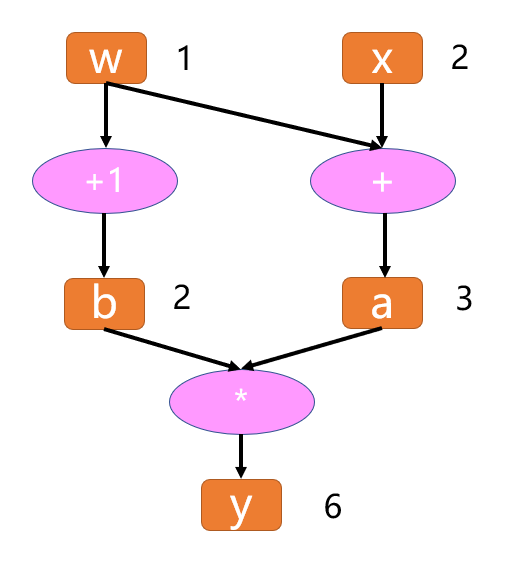

有了计算图，我们可以尝试进行前向传播（forward），带入 \(x, w\) 的输入数据，就得到结果 \(y\)。

同样的，如果需要获取各参数的导数，也可以方便地获得。



### 计算图求导  

假设我们要算 \( y \) 对 \( w \) 的导数,在计算图中要怎么做呢？  

先来看 \( w \) 和 \( y \) 之间的关系，\( w \) 会通过左边这条路走到 \( y \)，也会通过右边这条路走到 \( y \)，因此梯度也是一样的，会经过这两条路反馈回来。  

所以 \( y \) 对 \( w \) 的偏导有两条路径，可以写成以下形式：  

$ \frac{\partial y}{\partial w} = \frac{\partial y}{\partial a} \cdot \frac{\partial a}{\partial w} + \frac{\partial y}{\partial b} \cdot \frac{\partial b}{\partial w} $

然后可以通过计算图依次求出。  

如图所示：  

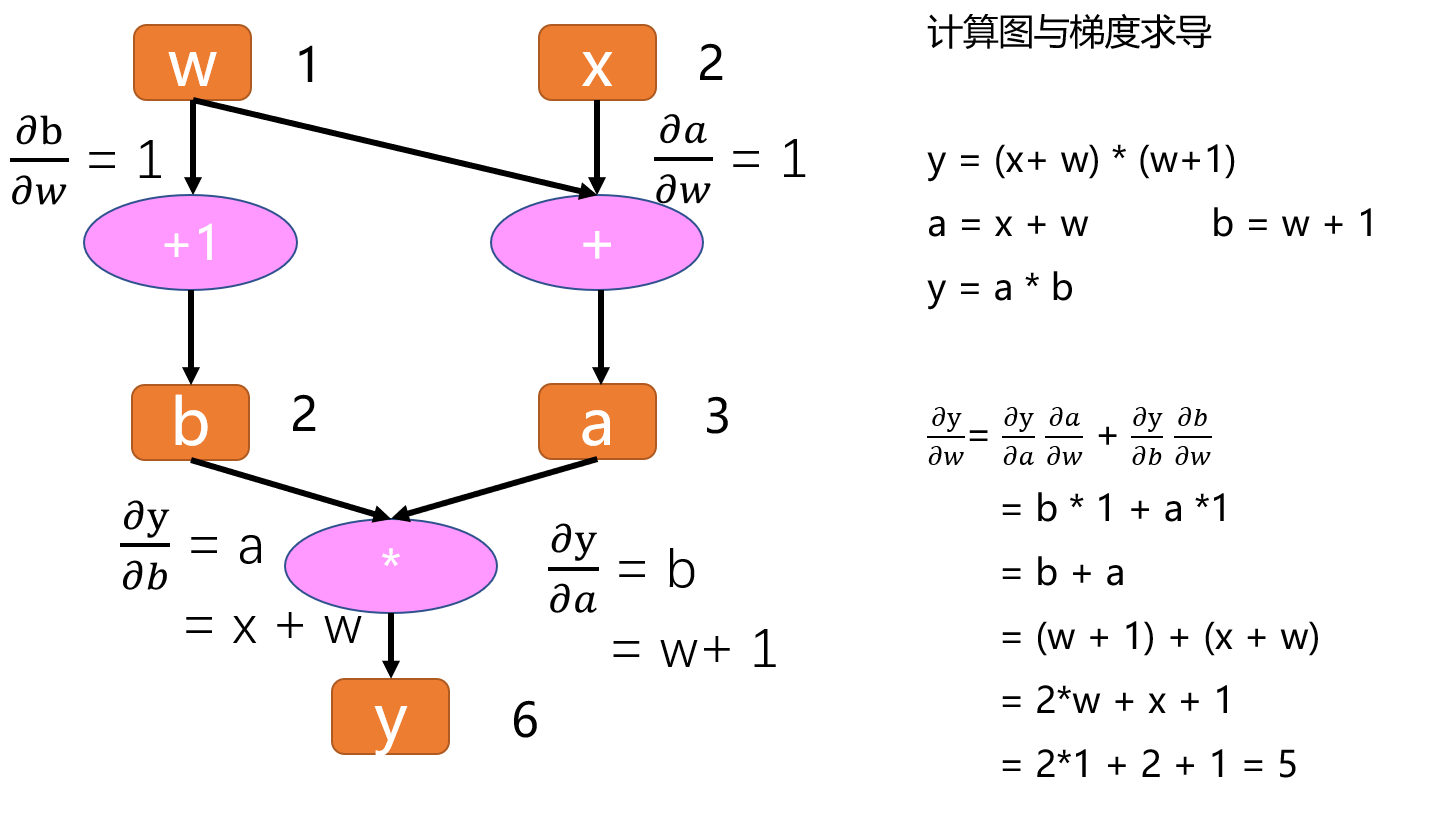

这样我们得到 \( y \) 对 \( w \) 的导数是 5，我们可以拿纸和笔推一下，是否是一样的。  

我们发现，所有的偏微分计算所需要用到的数据都是基于 \( w \) 和 \( x \) 的，这里，\( w \) 和 \( x \) 就称为叶子结点。  

叶子结点是最基础结点，其数据不是由运算生成的，因此是整个计算图的基石，是不可轻易“修改”的。而最终计算得到的 \( y \) 就是根节点，就像一棵树一样，叶子在上面，根在下面。


### 叶子结点  

叶子结点是最基础的结点，其数据不是由运算生成的，因此是整个计算图的基石，是不可轻易“修改”的。而最终计算得到的 \( y \) 就是根节点，就像一棵树一样，叶子在上面，根在下面。  

张量有一个属性是 `is_leaf`，就是用来指示一个张量是否为叶子结点的属性。  

我们通过代码，实现以上运算，并查看该计算图的叶子结点和梯度。

In [23]:
import torch

w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)     # retain_grad()
y = torch.mul(a, b)

y.backward()
print(w.grad)

# 查看叶子结点
print("is_leaf:\n", w.is_leaf, x.is_leaf, a.is_leaf, b.is_leaf, y.is_leaf)
# 查看梯度
print("gradient:\n", w.grad, x.grad, a.grad, b.grad, y.grad)
# 查看 grad_fn
print("grad_fn:\n", w.grad_fn, x.grad_fn, a.grad_fn, b.grad_fn, y.grad_fn)

tensor([5.])
is_leaf:
 True True False False False
gradient:
 tensor([5.]) tensor([2.]) None None None
grad_fn:
 None None <AddBackward0 object at 0x1227f24a0> <AddBackward0 object at 0x12549f820> <MulBackward0 object at 0x1254a3340>


/var/folders/z2/s5q05z8n4537pyvqd1m5yq9h0000gp/T/ipykernel_17620/4086981675.py:16: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print("gradient:\n", w.grad, x.grad, a.grad, b.grad, y.grad)


我们发现 \( y \) 就不是叶子结点了，因为它是由结点 \( w \) 和结点 \( x \) 通过乘法运算得到的。  

### 补充知识点1：非叶子结点在梯度反向传播结束后释放  

只有叶子节点的梯度得到保留，中间变量的梯度默认不保留；在 PyTorch 中，非叶子结点的梯度在反向传播结束之后会被释放掉，如果需要保留的话可以对该结点设置 `retain_grad()`。  

### 补充知识点2：`grad_fn` 是用来记录创建张量时所用到的运算，在链式求导法则中会使用到。  

思考一下 \( y \) 对 \( w \) 求导的过程，我们知道只要记录下计算图中的结点（数据）和边（运算），就可以通过链式法则轻易地求取梯度。  

所以在 PyTorch 中，自动微分的关键就是记录数据和该结点的运算。回想一下张量的结构当中其实就记录了这两个重要的东西。  

在张量中，数据对应着 `data`，结点的运算对应着 `grad_fn`。大家现在应该明白为什么结点的运算叫 `grad_fn` 而不叫 `fn` 了吧，因为这个运算是在求梯度的时候使用的。

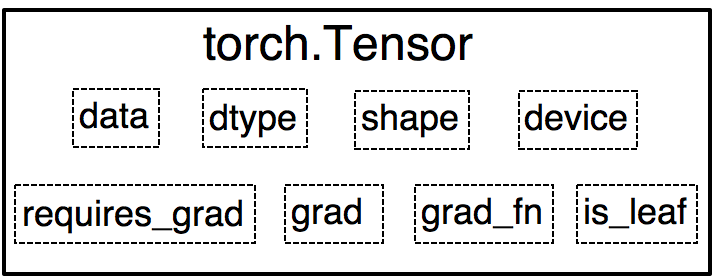

## 静态图与动态图  

以上就是计算图的简单介绍。计算图根据计算图的搭建方式可以划分为静态图和动态图。  

PyTorch 是典型的动态图，TensorFlow 是静态图（TF 2.x 也支持动态图模式）。  

### 动态图和静态图的搭建方式有何不同，如何判断和区分？  

**第一种判断：** 这就要看运算，是在计算图搭建之后，还是两者同步进行。  

先搭建计算图，再运算，这就是静态图机制。  

而在运算的同时去搭建计算图，这就是动态图机制。  

**第二种判断：** 也可以通过判断运算过程中，计算图是否可变动来区分静态图与动态图。  

在运算过程中，计算图可变动的是动态图；计算图不可变，是静止的，就是静态图。  

下面来看两个示意图。
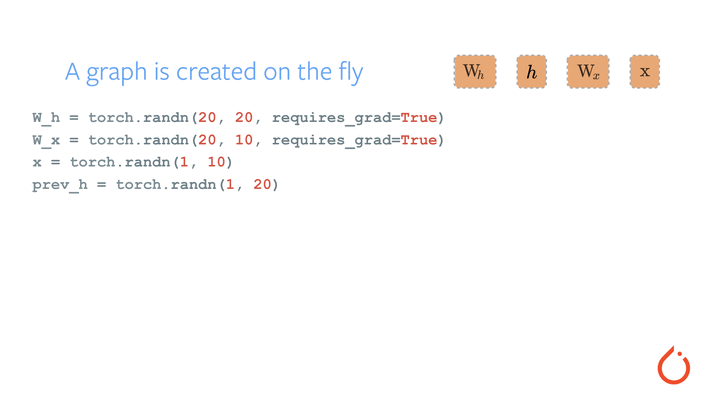
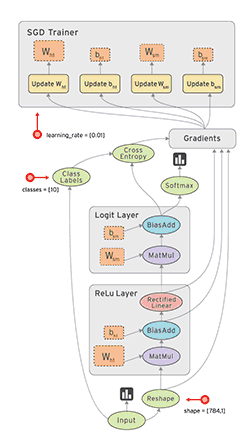

图1为 PyTorch 的动态图示意，图2为 TensorFlow 的静态图示意。

### 动态图优点：

- **易理解：** 程序按照编写命令的顺序进行执行
- **灵活性：** 可依据模型运算结果来决定计算图

### 静态图优点：

- **高效性：** 优化计算图，提高运算效率（但在 GPU 时代，这一点对于初学者而言可忽略不计）

#### 缺点：

- **晦涩性：** 需要学习 `session`，`placeholder` 等概念，调试困难



## autograd  
在进行h2h、i2h、next_h、loss的计算过程中，逐步搭建计算图，同时针对每一个变量（tensor）都存储计算梯度所必备的grad_fn，便于自动求导系统使用。当计算到根节点后，在根节点调用.backward()函数，即可自动反向传播计算计算图中所有节点的梯度。这就是pytorch自动求导机制，其中涉及张量类、计算图、grad_fn、链式求导法则等基础概念，大家可以自行补充学习。

- 自动求导机制通过有向无环图（directed acyclic graph ，DAG）实现  
- 在 DAG 中，记录数据（对应 `tensor.data`）以及操作（对应 `tensor.grad_fn`）  
- 操作在 PyTorch 中统称为 Function，如加法、减法、乘法、ReLU、conv、Pooling 等，统统是 Function


### 使用 `autograd` 的方法

`autograd` 的使用有很多方法，这里重点讲解一下三个，并在最后汇总一些知识点。更多 API 推荐阅读[官方文档](https://pytorch.org/docs/stable/autograd.html)。

#### 1. `torch.autograd.backward`

`backward` 函数是使用频率最高的自动求导函数，没有之一。99% 的训练代码中都会用它进行梯度求导，然后更新权重。

虽然绝大多数都是直接使用，但是 `backward()` 里边还有一些高级参数，值得了解。

#### 参数说明

```python
torch.autograd.backward(
    tensors, 
    grad_tensors=None, 
    retain_graph=None, 
    create_graph=False, 
    grad_variables=None, 
    inputs=None
)
```

- **tensors (Sequence[Tensor] or Tensor)** – 用于求导的张量。如上例的 `loss`。
- **grad_tensors (Sequence[Tensor or None] or Tensor, optional)** – 雅克比向量积中使用，详细作用请看代码演示。
- **retain_graph (bool, optional)** – 是否需要保留计算图。PyTorch 的机制是在反向传播结束时，计算图释放以节省内存。大家可以尝试连续使用 `loss.backward()`，就会报错。如果需要多次求导，则在执行 `backward()` 时，`retain_graph=True`。
- **create_graph (bool, optional)** – 是否创建计算图，用于高阶求导。
- **inputs (Sequence[Tensor] or Tensor, optional)** – Inputs w.r.t. which the gradient be accumulated into `.grad`。其他张量将被忽略。如果没有提供，梯度将会累积到用于计算 `tensors` 的所有叶子张量中。

#### 补充说明

我们使用时候都是在张量上直接调用 `.backward()` 函数，但这里却是 `torch.autograd.backward`，为什么不一样呢？其实 `Tensor.backward()` 接口内部调用了 `autograd.backward`。



In [25]:
#####  retain_graph=True
import torch
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)  

y.backward(retain_graph=True)
print(w.grad)
y.backward()
print(w.grad)

tensor([5.])
tensor([10.])


In [26]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)     
b = torch.add(w, 1)

y0 = torch.mul(a, b)    # y0 = (x+w) * (w+1)    dy0/dw = 2w + x + 1
y1 = torch.add(a, b)    # y1 = (x+w) + (w+1)    dy1/dw = 2

loss = torch.cat([y0, y1], dim=0)       # [y0, y1]

grad_tensors = torch.tensor([1., 2.])

loss.backward(gradient=grad_tensors)    # Tensor.backward中的 gradient 传入 torch.autograd.backward()中的grad_tensors

# w =  1* (dy0/dw)  +   2*(dy1/dw)
# w =  1* (2w + x + 1)  +   2*(w)
# w =  1* (5)  +   2*(2)
# w =  9

print(w.grad)

tensor([9.])


### `torch.autograd.grad`

```python
torch.autograd.grad(
    outputs, 
    inputs, 
    grad_outputs=None, 
    retain_graph=None, 
    create_graph=False, 
    only_inputs=True, 
    allow_unused=False
)
```

#### 功能
计算 `outputs` 对 `inputs` 的导数。

#### 主要参数

- **outputs (sequence of Tensor)** – 用于求导的张量，如 `loss`。
- **inputs (sequence of Tensor)** – 所要计算导数的张量。
- **grad_outputs (sequence of Tensor)** – 雅克比向量积中使用。
- **retain_graph (bool, optional)** – 是否需要保留计算图。PyTorch 的机制是在反向传播结束时，计算图释放以节省内存。大家可以尝试连续使用 `loss.backward()`，就会报错。如果需要多次求导，则在执行 `backward()` 时，`retain_graph=True`。
- **create_graph (bool, optional)** – 是否创建计算图，用于高阶求导。
- **allow_unused (bool, optional)** – 是否需要指示，计算梯度时未使用的张量是错误的。

此函数使用上比较简单，请看案例：


In [27]:
import torch
x = torch.tensor([3.], requires_grad=True)
y = torch.pow(x, 2)     # y = x**2

# 一阶导数
grad_1 = torch.autograd.grad(y, x, create_graph=True)   # grad_1 = dy/dx = 2x = 2 * 3 = 6
print(grad_1)

# 二阶导数
grad_2 = torch.autograd.grad(grad_1[0], x)              # grad_2 = d(dy/dx)/dx = d(2x)/dx = 2
print(grad_2)

(tensor([6.], grad_fn=<MulBackward0>),)
(tensor([2.]),)


### `torch.autograd.Function`

有的时候，想要实现自己的一些操作（op），如特殊的数学函数、PyTorch 的模块中没有的网络层，那就需要自己写一个 `Function`。在 `Function` 中定义好 `forward` 的计算公式和 `backward` 的计算公式，然后将这些 op 组合到模型中，模型就可以用 autograd 完成梯度求取。

这个概念还是很抽象，平时用得不多，但是自己想要自定义网络时，常常需要自己写 op，那么它就很好用了。为了让大家掌握自定义 op——`Function` 的写法，特地从多处收集了四个案例，大家多运行代码体会 `Function` 如何写。


### 案例1： exp

案例1：来自 [PyTorch Autograd Documentation](https://pytorch.org/docs/stable/autograd.html#function)

假设需要一个计算指数的功能，并且能组合到模型中，实现 autograd，那么可以这样实现：

1. **第一步：继承Function**
2. **第二步：实现forward**
3. **第三步：实现backward**

### 注意事项：

- `forward` 和 `backward` 函数第一个参数为 `ctx`，它的作用类似于类函数的 `self` 一样。更详细解释可参考如下：在前向传播中，我们接收一个包含输入的 Tensor，返回一个包含输出的 Tensor。`ctx` 是一个上下文对象，可以用来存储反向传播计算所需的信息。你可以使用 `ctx.save_for_backward` 方法缓存任意对象，以便在反向传播中使用。

- `backward` 函数返回的参数个数与 `forward` 的输入参数个数相同，即，传入该 op 的参数，都需要给它们计算对应的梯度。


In [29]:
import torch
from torch.autograd.function import Function

class Exp(Function):
    @staticmethod
    def forward(ctx, i):

        # ============== step1: 函数功能实现 ==============
        result = i.exp()
        # ============== step1: 函数功能实现 ==============

        # ============== step2: 结果保存，用于反向传播 ==============
        ctx.save_for_backward(result)
        # ============== step2: 结果保存，用于反向传播 ==============

        return result
    @staticmethod
    def backward(ctx, grad_output):

        # ============== step1: 取出结果，用于反向传播 ==============
        result, = ctx.saved_tensors
        # ============== step1: 取出结果，用于反向传播 ==============


        # ============== step2: 反向传播公式实现 ==============
        grad_results = grad_output * result
        # ============== step2: 反向传播公式实现 ==============


        return grad_results

x = torch.tensor([1.], requires_grad=True)  
y = Exp.apply(x)                          # 需要使用apply方法调用自定义autograd function
print(y)                                  #  y = e^x = e^1 = 2.7183
y.backward()                            
print(x.grad)                           # 反传梯度,  x.grad = dy/dx = e^x = e^1  = 2.7183

# 关于本例子更详细解释，推荐阅读 https://zhuanlan.zhihu.com/p/321449610

tensor([2.7183], grad_fn=<ExpBackward>)
tensor([2.7183])


从代码里可以看到，y这个张量的 grad_fn 是 ExpBackward，正是我们自己实现的函数，这表明当y求梯度时，会调用ExpBackward这个函数进行计算
这也是张量的grad_fn的作用所在

### 案例2：为梯度乘以一定系数 Gradcoeff

案例2来自：[知乎文章](https://zhuanlan.zhihu.com/p/321449610)

功能是反向传梯度时乘以一个自定义系数。


In [30]:
class GradCoeff(Function):       

    @staticmethod
    def forward(ctx, x, coeff):                 

        # ============== step1: 函数功能实现 ==============
        ctx.coeff = coeff   # 将coeff存为ctx的成员变量
        x.view_as(x)
        # ============== step1: 函数功能实现 ==============
        return x

    @staticmethod
    def backward(ctx, grad_output):            
        return ctx.coeff * grad_output, None    # backward的输出个数，应与forward的输入个数相同，此处coeff不需要梯度，因此返回None

# 尝试使用
x = torch.tensor([2.], requires_grad=True)
ret = GradCoeff.apply(x, -0.1)                  # 前向需要同时提供x及coeff，设置coeff为-0.1
ret = ret ** 2                          
print(ret)                                      # 注意看： ret.grad_fn 
ret.backward()  
print(x.grad)

tensor([4.], grad_fn=<PowBackward0>)
tensor([-0.4000])


在这里需要注意 backward函数返回的参数个数与forward的输入参数个数相同
即，传入该op的参数，都需要给它们计算对应的梯度。

### 案例3：勒让德多项式

案例来自：[GitHub](https://github.com/excelkks/blog)

假设多项式为：$y = a + bx + cx^2 + dx^3$ 时，用两步替代该过程 $y = a + b \times P_3(c + dx)$，其中 $P_3(x) = \frac{1}{2}(5x^3 - 3x)$。


In [41]:
import torch
import math
from torch.autograd.function import Function

class LegendrePolynomial3(Function):
    @staticmethod
    def forward(ctx, x):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        y = 0.5 * (5 * x ** 3 - 3 * x)
        ctx.save_for_backward(x)
        return y

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        ret, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * ret ** 2 - 1)

a, b, c, d = 1, 2, 1, 2 
x = 1
P3 = LegendrePolynomial3.apply
y_pred = a + b * P3(c + d * x)
print(y_pred)

127.0



## 案例4：手动实现2D卷积

案例来自：[PyTorch Tutorial](https://pytorch.org/tutorials/intermediate/custom_function_conv_bn_tutorial.html)

案例本是卷积与 BN 的融合实现，此处仅观察 `Function` 的使用。更详细的内容，十分推荐阅读原文章。下面看如何实现 `conv_2d` 的。


In [49]:
import torch
from torch.autograd.function import once_differentiable
import torch.nn.functional as F


def convolution_backward(grad_out, X, weight):
    """
    将反向传播功能用函数包装起来，返回的参数个数与forward接收的参数个数保持一致，为2个
    """
    grad_input = F.conv2d(X.transpose(0, 1), grad_out.transpose(0, 1)).transpose(0, 1)
    grad_X = F.conv_transpose2d(grad_out, weight)
    return grad_X, grad_input

class MyConv2D(torch.autograd.Function):
    @staticmethod
    def forward(ctx, X, weight):
        ctx.save_for_backward(X, weight)

        # ============== step1: 函数功能实现 ==============
        ret = F.conv2d(X, weight) 
        # ============== step1: 函数功能实现 ==============
        return ret

    @staticmethod
    def backward(ctx, grad_out):
        X, weight = ctx.saved_tensors
        return convolution_backward(grad_out, X, weight)
        
weight = torch.rand(5, 3, 3, 3, requires_grad=True, dtype=torch.double) #5
X = torch.rand(10, 3, 7, 7, requires_grad=True, dtype=torch.double)
# gradcheck 会检查你实现的自定义操作的前向传播 (forward) 和反向传播 (backward) 方法是否正确计算了梯度。
# 如果返回 True，则表示梯度检查通过，即自定义操作的梯度计算与数值近似梯度之间的一致性在允许的误差范围内；
# 如果返回 False，则说明存在不匹配，需要检查和修正自定义操作的反向传播逻辑。
print("梯度检查: ", torch.autograd.gradcheck(MyConv2D.apply, (X, weight))) # gradcheck 功能请自行了解，通常写完Function会用它检查一下
y = MyConv2D.apply(X, weight)
label = torch.randn_like(y)
loss = F.mse_loss(y, label)
print(X.shape)
print(weight.shape)
print(X[0])
print(y.shape)
print("反向传播前，weight.grad: ", weight.grad)
loss.backward()
print("反向传播后，weight.grad: ", weight.grad)

梯度检查:  True
torch.Size([10, 3, 7, 7])
torch.Size([5, 3, 3, 3])
tensor([[[0.2232, 0.0818, 0.1190, 0.8639, 0.1115, 0.8183, 0.7287],
         [0.5064, 0.0102, 0.5594, 0.0393, 0.3828, 0.7005, 0.5347],
         [0.8296, 0.1421, 0.1171, 0.0511, 0.4739, 0.7162, 0.5985],
         [0.0754, 0.4444, 0.5309, 0.7183, 0.4736, 0.3417, 0.3113],
         [0.2430, 0.2894, 0.6053, 0.3642, 0.5891, 0.4954, 0.9387],
         [0.5139, 0.7670, 0.9342, 0.8053, 0.8698, 0.1676, 0.0727],
         [0.2040, 0.8269, 0.7065, 0.6459, 0.9538, 0.3722, 0.0667]],

        [[0.1710, 0.1105, 0.2097, 0.9528, 0.2482, 0.8605, 0.0078],
         [0.8362, 0.7012, 0.6294, 0.1587, 0.1390, 0.0089, 0.7298],
         [0.2005, 0.0406, 0.6173, 0.3625, 0.9800, 0.0188, 0.5491],
         [0.4713, 0.0835, 0.1666, 0.2352, 0.4968, 0.6673, 0.8779],
         [0.6202, 0.6812, 0.2878, 0.0926, 0.8444, 0.9543, 0.3704],
         [0.3047, 0.9775, 0.4660, 0.1847, 0.2940, 0.2440, 0.0608],
         [0.5145, 0.8353, 0.1448, 0.2086, 0.3975, 0.2076, 0.9668

### Autograd相关的知识点  

Autograd使用过程中还有很多需要注意的地方，在这里做个小汇总。  

- 知识点一：<span style="color: red; font-size: 16px;">梯度不会自动清零</span>   

在PyTorch中，每次进行反向传播时，梯度信息会被累加到当前的梯度缓存中，而不会自动清零。因此，在每次反向传播之前，需要手动将梯度清零，以避免干扰后续的梯度计算。  

- 知识点二： 依赖于叶子结点的结点，requires_grad默认为True  

在进行计算图构建时，如果一个张量由叶子结点计算得到，它的`requires_grad`属性默认为`True`。这意味着它会保留计算图，以便进行反向传播。  

- 知识点三： 叶子结点不可执行in-place  

叶子结点的操作不能是in-place的，即它们的值不能被直接修改。因为这会影响到计算图和梯度计算的正确性。  

- 知识点四： detach 的作用  

`detach()`方法用于从当前计算图中分离张量，使其不再计算梯度，常用于停止梯度的反向传播。  

- 知识点五： with torch.no_grad()的作用  

`with torch.no_grad():`上下文管理器用于禁止计算图的构建和梯度计算，通常用于推理阶段以节省内存和计算资源。

#### 知识点一：梯度不会自动清零
因为梯度不会自动清零，所以实际训练时候多个epoch常用optimizer.zero_grad()来清空上一次梯度。

In [50]:
import torch
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

for i in range(4):
    a = torch.add(w, x)
    b = torch.add(w, 1)
    y = torch.mul(a, b)

    y.backward()   
    print(w.grad)  # 梯度不会自动清零，数据会累加， 通常需要采用 optimizer.zero_grad() 完成对参数的梯度清零

#     w.grad.zero_()

tensor([5.])
tensor([10.])
tensor([15.])
tensor([20.])


#### 知识点二：依赖于叶子结点的结点，requires_grad默认为True
结点的运算依赖于叶子结点的话，它一定是要计算梯度的，因为叶子结点梯度的计算是从后向前传播的，因此与其相关的结点均需要计算梯度，这点还是很好理解的。

In [51]:
import torch
w = torch.tensor([1.], requires_grad=True)  # 
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)

print(a.requires_grad, b.requires_grad, y.requires_grad)
print(a.is_leaf, b.is_leaf, y.is_leaf)

True True True
False False False


#### 知识点三：叶子张量不可以执行in-place操作
叶子结点不可执行in-place，因为计算图的backward过程都依赖于叶子结点的计算，可以回顾计算图当中的例子，所有的偏微分计算所需要用到的数据都是基于w和x（叶子结点），因此叶子结点不允许in-place操作。

In [52]:
a = torch.ones((1, ))
print(id(a), a)

a = a + torch.ones((1, ))
print(id(a), a)

a += torch.ones((1, ))
print(id(a), a)

5478704832 tensor([1.])
5750913808 tensor([2.])
5750913808 tensor([3.])


#### 知识点四：detach 的作用
通过以上知识，我们知道计算图中的张量是不能随便修改的，否则会造成计算图的backward计算错误，那有没有其他方法能修改呢？当然有，那就是detach()

detach的作用是：从计算图中剥离出“数据”，并以一个新张量的形式返回，并且新张量与旧张量共享数据，简单的可理解为做了一个别名。 请看下例的w，detach后对w_detach修改数据，w同步地被改为了999

In [54]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)

y.backward()
print(w)
w_detach = w.detach()
w_detach.data[0] = 999
print(w)

tensor([1.], requires_grad=True)
tensor([999.], requires_grad=True)


#### 知识点五：with torch.no_grad()的作用
autograd自动构建计算图过程中会保存一系列中间变量，以便于backward的计算，这就必然需要花费额外的内存和时间。
而并不是所有情况下都需要backward，例如推理的时候，因此可以采用上下文管理器——torch.no_grad()来管理上下文，让pytorch不记录相应的变量，以加快速度和节省空间。
详见：https://pytorch.org/docs/stable/generated/torch.no_grad.html?highlight=no_grad#torch.no_grad
